In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_excel('/content/handm_final_draft.xlsx')

In [ ]:
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3078 entries, 0 to 3077
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   article_id              3078 non-null   float64
 1   product_code            3078 non-null   float64
 2   prod_name               3078 non-null   object 
 3   colour_group_name       3078 non-null   object 
 4   department_name         3078 non-null   object 
 5   index_name              3078 non-null   object 
 6   t_dat                   3078 non-null   object 
 7   customer_id             240 non-null    object 
 8   price                   3078 non-null   float64
 9   club_member_status      3078 non-null   object 
 10  fashion_news_frequency  3078 non-null   object 
 11  customer_age            3078 non-null   int64  
 12  postal_codes            3078 non-null   int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 312.7+ KB


In [ ]:
df.describe()

,article_id,product_code,price,customer_age,postal_codes
count,3.078000e+03,3078.000000,3.078000e+03,3078.000000,3078.000000
mean,3.398014e+08,339801.332034,1.655727e+05,22.300195,20883.404483
std,7.834624e+07,78346.246712,2.290546e+06,7.032462,31.013293
min,1.087750e+08,108775.000000,2.990000e+00,12.000000,20777.000000
25%,2.934330e+08,293433.000000,1.299000e+01,17.000000,20853.000000
50%,3.577715e+08,357771.500000,1.999000e+01,21.000000,20889.000000
75%,4.002960e+08,400296.000000,2.800000e+01,25.000000,20902.000000
max,4.472010e+08,447201.000000,3.184746e+07,78.000000,21797.000000


In [ ]:
df.nunique()

article_id                2998
product_code               747
prod_name                  916
colour_group_name           46
department_name            107
index_name                  10
t_dat                        2
customer_id                148
price                      167
club_member_status           2
fashion_news_frequency       2
customer_age                43
postal_codes                44
dtype: int64

# **Questions to answer:**

1. Would active members spend more than non-active customers?
2. What is the most popular product in each age group and how much does each group spend on average? Top 5 and bottom 5

16-24: young adult

25-44: adult 1

45-64: adult 2

65+ senior
3. Top 5 postal codes with highest amount spent and lowest 5
4. Which department name sold the most product?
5. Top 10 product names in each product type/group
6. Top 10 most purchased products purchased in the top 5 postal codes


In [ ]:
df.isnull().sum()

article_id                   0
product_code                 0
prod_name                    0
colour_group_name            0
department_name              0
index_name                   0
t_dat                        0
customer_id               2838
price                        0
club_member_status           0
fashion_news_frequency       0
customer_age                 0
postal_codes                 0
dtype: int64

In [ ]:
df['t_dat']= df['t_dat'].fillna('9/20/2018')
df

,article_id,product_code,prod_name,colour_group_name,department_name,index_name,t_dat,customer_id,price,club_member_status,fashion_news_frequency,customer_age,postal_codes
0,108775015.0,108775.0,Strap top,Black,Jersey Basic,Ladieswear,2018-09-20,05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...,8.46,IN_ACTIVE,NONE,20,20777
1,108775015.0,108775.0,Strap top,Black,Jersey Basic,Ladieswear,2018-09-20,05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...,8.46,IN_ACTIVE,NONE,19,20812
2,108775015.0,108775.0,Strap top,Black,Jersey Basic,Ladieswear,2018-09-20,0aaa9683d5f45b85d0f9a81e2f4d4ef774fed43339fb75...,8.46,IN_ACTIVE,NONE,21,20814
3,108775044.0,108775.0,Strap top,White,Jersey Basic,Ladieswear,9/20/2018,NaN,8.46,IN_ACTIVE,NONE,18,20815
4,108775051.0,108775.0,Strap top (1),Off White,Jersey Basic,Ladieswear,9/20/2018,NaN,8.46,IN_ACTIVE,NONE,19,20816
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073,436261001.0,436261.0,Control Top 30 den 1p Tights,Black,Tights basic,Lingeries/Tights,2018-09-20,06e0e78fc07ac4c4bea2a9cd32916be469c943cc2f63ba...,11.29,IN_ACTIVE,NONE,19,20889
3074,443696011.0,443696.0,BO basic OH BB,Light Blue,Young Boy Jersey Basic,Children Sizes 134-170,2018-09-20,0f2fa21108855cedacddf9fc6cfb20c50c7ca91412d0c2...,25.41,IN_ACTIVE,NONE,19,20889
3075,445865001.0,445865.0,Dungaree Dress,Light Blue,Denim Other Garments,Divided,2018-09-20,06a22599668b2dce074dfd55d8e698b8497f0eb1411bb7...,28.80,IN_ACTIVE,NONE,22,20889
3076,446224002.0,446224.0,Maja Cardigan,Black,Tops Knitwear,Divided,2018-09-20,1062ef0b8ccbc2f7eddc045da996713b4fb986f4557509...,23.54,IN_ACTIVE,NONE,32,20889


In [ ]:
df= df.drop(columns = 'FN')
df

In [ ]:
df= df.drop(columns = 'index_code')
df

In [ ]:
df = df.drop(columns = 'index_group_no')
df

In [ ]:
df = df.drop(columns = 'section_name')
df

In [ ]:
df= df.drop(columns = 'section_no')
df

In [ ]:
df = df.drop(columns = 'garment_group_no')
df

In [ ]:
df = df.drop(columns = 'garment_group_name')
df

In [ ]:
df = df.drop(columns =['graphical_appearance_name', 'colour_group_code', 'perceived_colour_value_id'])
df

In [ ]:
df.to_csv('handm_draft1.csv')

In [ ]:
# delete columns:
# perceived_colour_value, perceived_colour_master_id, sales_channel_id, department_number (?)

# columns to think about:
# index_group_name or index_name, detail_desc
# perceived_colour_value_name or perceived_colour_master_name or colour_group_name (which one should we keep?)

In [ ]:
df = pd.read_csv('/content/handm_draft8.csv')
df.head(1)

,article_id,product_code,prod_name,colour_group_name,department_name,index_name,t_dat,customer_id,price,club_member_status,fashion_news_frequency,customer_age,postal_codes
0,108775015.0,108775.0,Strap top,Black,Jersey Basic,Ladieswear,2018-09-20,05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...,8.46,IN_ACTIVE,NONE,20,20777


In [ ]:
df = df.drop(columns =['Unnamed: 0', 'perceived_colour_value_name', 'perceived_colour_master_id', 'sales_channel_id', 'department_no', 'index_group_name',
                       'perceived_colour_master_name', 'detail_desc', 'perceived_colour_value_name'])
df

In [ ]:
df = df.drop(columns = ['Unnamed: 0.1'])
df.head(2)

In [ ]:
df.to_csv('handm_draft8.csv', index = False)

In [ ]:
df

,article_id,product_code,prod_name,colour_group_name,department_name,index_name,t_dat,customer_id,price,club_member_status,fashion_news_frequency,customer_age,postal_codes
0,108775015.0,108775.0,Strap top,Black,Jersey Basic,Ladieswear,2018-09-20,05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...,8.46,IN_ACTIVE,NONE,20,20777
1,108775015.0,108775.0,Strap top,Black,Jersey Basic,Ladieswear,2018-09-20,05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...,8.46,IN_ACTIVE,NONE,19,20812
2,108775015.0,108775.0,Strap top,Black,Jersey Basic,Ladieswear,2018-09-20,0aaa9683d5f45b85d0f9a81e2f4d4ef774fed43339fb75...,8.46,IN_ACTIVE,NONE,21,20814
3,108775044.0,108775.0,Strap top,White,Jersey Basic,Ladieswear,9/20/2018,NaN,8.46,IN_ACTIVE,NONE,18,20815
4,108775051.0,108775.0,Strap top (1),Off White,Jersey Basic,Ladieswear,9/20/2018,NaN,8.46,IN_ACTIVE,NONE,19,20816
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3073,436261001.0,436261.0,Control Top 30 den 1p Tights,Black,Tights basic,Lingeries/Tights,2018-09-20,06e0e78fc07ac4c4bea2a9cd32916be469c943cc2f63ba...,11.29,IN_ACTIVE,NONE,19,20889
3074,443696011.0,443696.0,BO basic OH BB,Light Blue,Young Boy Jersey Basic,Children Sizes 134-170,2018-09-20,0f2fa21108855cedacddf9fc6cfb20c50c7ca91412d0c2...,25.41,IN_ACTIVE,NONE,19,20889
3075,445865001.0,445865.0,Dungaree Dress,Light Blue,Denim Other Garments,Divided,2018-09-20,06a22599668b2dce074dfd55d8e698b8497f0eb1411bb7...,28.80,IN_ACTIVE,NONE,22,20889
3076,446224002.0,446224.0,Maja Cardigan,Black,Tops Knitwear,Divided,2018-09-20,1062ef0b8ccbc2f7eddc045da996713b4fb986f4557509...,23.54,IN_ACTIVE,NONE,32,20889


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3078 entries, 0 to 3077
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   article_id              3078 non-null   float64
 1   product_code            3078 non-null   float64
 2   prod_name               3078 non-null   object 
 3   colour_group_name       3078 non-null   object 
 4   department_name         3078 non-null   object 
 5   index_name              3078 non-null   object 
 6   t_dat                   3078 non-null   object 
 7   customer_id             240 non-null    object 
 8   price                   3078 non-null   float64
 9   club_member_status      3078 non-null   object 
 10  fashion_news_frequency  3078 non-null   object 
 11  customer_age            3078 non-null   int64  
 12  postal_codes            3078 non-null   int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 312.7+ KB


In [ ]:
df.insert(16,'postal_codes', [
20777,
20812,
20814,
20815,
20816,
20817,
20818,
20832,
20833,
20837,
20838,
20839,
20841,
20842,
20850,
20851,
20852,
20853,
20854,
20855,
20860,
20861,
20862,
20866,
20868,
20871,
20872,
20874,
20876,
20877,
20878,
20879,
20882,
20886,
20889,
20892,
20894,
20895,
20899,
20901,
20902,
20903,
20904,
20905,
20906,
20910,
20912,
21771,
21797,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20901,
20902,
20903,
20904,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20905,
20906,
20889,
20892,
20850,
20851,
20852,
20853,
20853,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20889,
20889,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20889,
20886,
20889,
20889,
20889,
20889,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20889,
20889,
20889,
20889,
20889,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20889,
20889,
20889,
20889,
20889,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20889,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20889,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20889,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20886,
20889,
20886,
20886,
20886,
20886,
20886,
20889,
20886,
20886,
20886,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889,
20889
  ], True)

df



In [ ]:
df = df.drop(columns =['postal_code'])
df

In [ ]:
df = df.drop(columns =['product_type_name', 'product_type_no', 'product_group_name'])
df.head(2)

In [ ]:
df.to_csv('handm_draft6.csv', index = False)

In [ ]:
df.describe()

In [ ]:
#What age spends the most money?
df[['age', 'price']].max()

In [ ]:
#What is the maximum amount that a customer has paid during a single purchase?
df['price'].max()


In [ ]:
#What is the average price point active customers spend?
pd.pivot_table(df, index=['Active'], values = ['price'])

In [ ]:
#What are the average spending habits based on age?
pd.pivot_table(df, index=['age'], values = ['price'])

In [ ]:
#Which postal code spend the most money?
#20777 Highland
#20812 Glen Echo
#20814 Bethesda
#20886 Montgomery Village
#20889 Bethesda
pd.pivot_table(df, index=['postal_codes'], values = ['price'])

NameError: name 'df' is not defined

In [ ]:

from matplotlib import pyplot as plt


import seaborn as sns


sns.set_palette('bright')


%matplotlib inline

In [ ]:
import seaborn as sns
from PIL import Image, ImageDraw

iter = 15

palette = list(reversed(sns.color_palette("Spectral_r", iter).as_hex()))
print(palette)

width_px=1000
new = Image.new(mode="RGB", size=(width_px,120))

for i in range(iter):

    newt = Image.new(mode="RGB", size=(width_px//iter,100), color=palette[i])
    new.paste(newt, (i*width_px//iter,10))

['#be254a', '#dc484c', '#ef6645', '#f88c51', '#fdb365', '#fed27f', '#feeb9d', '#fffebe', '#f0f9a7', '#d8ef9b', '#b3e0a2', '#89d0a4', '#60bba8', '#3f97b7', '#4273b3']


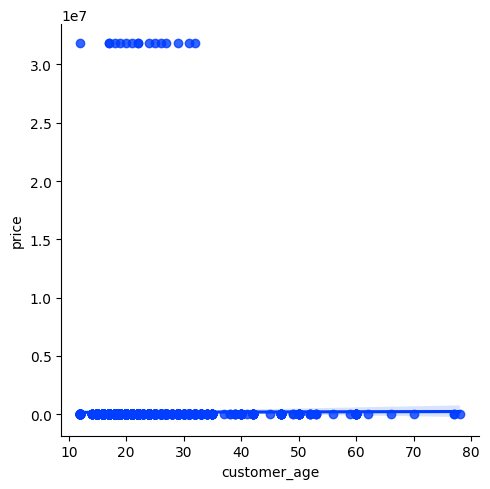

In [ ]:
#To delve further into age, is there a correlation between age and the amount of money a customer spend? If so, what is the type of relationship?
sns.lmplot(x = 'customer_age',
            y = 'price',
              data = df)

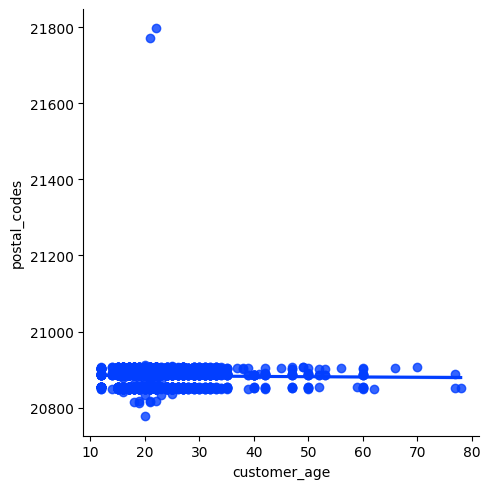

In [ ]:
#Customer Age and Postal Codes
sns.lmplot(x = 'customer_age',
            y = 'postal_codes',
              data = df)

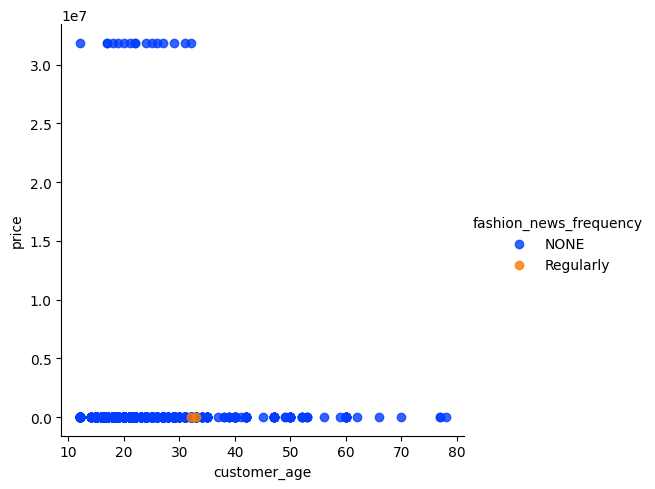

In [ ]:
sns.lmplot(x ='customer_age',
           y = 'price',
           data =df,
           fit_reg = False,
           hue ='fashion_news_frequency')

<ipython-input-81-13b72143ec19>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'customer_age',


<Axes: xlabel='customer_age', ylabel='count'>

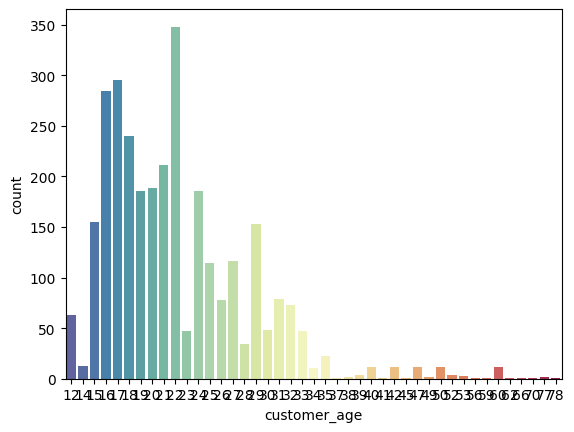

In [ ]:
#Which age make up the top spenders?
sns.countplot(x= 'customer_age',
              data =df,
              palette ='Spectral_r'
              )

<Axes: >

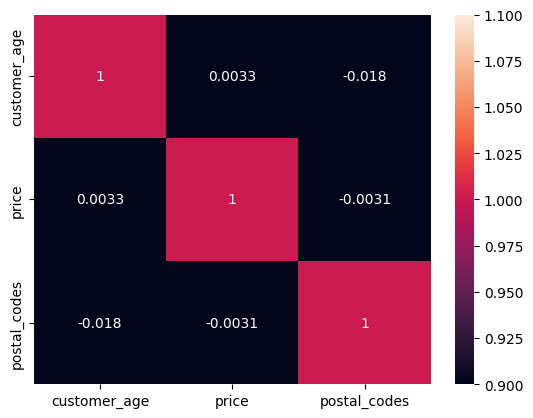

In [ ]:
#What is the correlation between age, price, and postal codes? Is it positive or negative? Describe the strength of the heat map.
palette ='Spectral_r'
df_numeric = df[['customer_age', 'price', 'postal_codes']]
corr = df_numeric.corr()

sns.heatmap(corr, vmin =1, annot = True)

<ipython-input-83-6e363cdee761>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= 'index_name',


<Axes: xlabel='index_name', ylabel='count'>

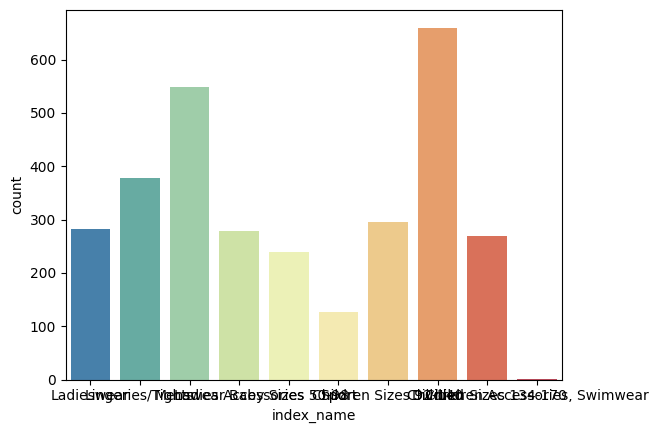

In [ ]:
#What product 'index' leads the way in purchases?
sns.countplot(x= 'index_name',
              data =df,
              palette ='Spectral_r'
              )

In [ ]:
df.head()

In [ ]:
df = df.drop(columns =['Unnamed: 0'])

In [ ]:
df.head(2)

,article_id,product_code,prod_name,colour_group_name,department_name,index_name,t_dat,customer_id,price,club_member_status,fashion_news_frequency,customer_age,postal_codes
0,108775015.0,108775.0,Strap top,Black,Jersey Basic,Ladieswear,2018-09-20,05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...,8457.627,IN_ACTIVE,NONE,20,20777
1,108775015.0,108775.0,Strap top,Black,Jersey Basic,Ladieswear,2018-09-20,05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...,8457.627,IN_ACTIVE,NONE,19,20812


In [ ]:
df['price'] = df['price'] * 1000
df.head(2)

,article_id,product_code,prod_name,colour_group_name,department_name,index_name,t_dat,customer_id,price,club_member_status,fashion_news_frequency,customer_age,postal_codes
0,108775015.0,108775.0,Strap top,Black,Jersey Basic,Ladieswear,2018-09-20,05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...,8457.627,IN_ACTIVE,NONE,20,20777
1,108775015.0,108775.0,Strap top,Black,Jersey Basic,Ladieswear,2018-09-20,05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...,8457.627,IN_ACTIVE,NONE,19,20812


In [ ]:
df.loc[df['product_code'] == 108775.0, 'price'] = 8.457627

In [ ]:
df.loc[df['product_code'] == 108775.0]

,article_id,product_code,prod_name,colour_group_name,department_name,index_name,t_dat,customer_id,price,club_member_status,fashion_news_frequency,customer_age,postal_codes
0,108775015.0,108775.0,Strap top,Black,Jersey Basic,Ladieswear,2018-09-20,05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...,8457.627,IN_ACTIVE,NONE,20,20777
1,108775015.0,108775.0,Strap top,Black,Jersey Basic,Ladieswear,2018-09-20,05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...,8457.627,IN_ACTIVE,NONE,19,20812
2,108775015.0,108775.0,Strap top,Black,Jersey Basic,Ladieswear,2018-09-20,0aaa9683d5f45b85d0f9a81e2f4d4ef774fed43339fb75...,8457.627,IN_ACTIVE,NONE,21,20814
3,108775044.0,108775.0,Strap top,White,Jersey Basic,Ladieswear,9/20/2018,NaN,8457.627,IN_ACTIVE,NONE,18,20815
4,108775051.0,108775.0,Strap top (1),Off White,Jersey Basic,Ladieswear,9/20/2018,NaN,8457.627,IN_ACTIVE,NONE,19,20816


In [ ]:
df.loc[df['product_code'] == 160442]

,article_id,product_code,prod_name,colour_group_name,department_name,index_name,t_dat,customer_id,price,club_member_status,fashion_news_frequency,customer_age,postal_codes
64,160442042.0,160442.0,Sneaker 3p Socks,Light Grey,Socks,Lingeries/Tights,9/20/2018,NaN,13540.0,IN_ACTIVE,NONE,24,20851
65,160442043.0,160442.0,3p Sneaker Socks,Light Grey,Shopbasket Socks,Lingeries/Tights,9/20/2018,NaN,13540.0,IN_ACTIVE,NONE,20,20852
2850,160442007.0,160442.0,3p Sneaker Socks,Black,Shopbasket Socks,Lingeries/Tights,2018-09-20,07f55174f0d632f1d95182e02f2807d38b506ccac85417...,13540.0,IN_ACTIVE,NONE,15,20886
2851,160442007.0,160442.0,3p Sneaker Socks,Black,Shopbasket Socks,Lingeries/Tights,2018-09-20,07f55174f0d632f1d95182e02f2807d38b506ccac85417...,13540.0,IN_ACTIVE,NONE,19,20886
2852,160442007.0,160442.0,3p Sneaker Socks,Black,Shopbasket Socks,Lingeries/Tights,2018-09-20,0c4bed26d668a494eb32f34c2a824a9dc21db3c1046351...,13540.0,IN_ACTIVE,NONE,31,20886
2853,160442007.0,160442.0,3p Sneaker Socks,Black,Shopbasket Socks,Lingeries/Tights,2018-09-20,0c4bed26d668a494eb32f34c2a824a9dc21db3c1046351...,13540.0,IN_ACTIVE,NONE,22,20886
2854,160442010.0,160442.0,3p Sneaker Socks,White,Shopbasket Socks,Lingeries/Tights,2018-09-20,0c4bed26d668a494eb32f34c2a824a9dc21db3c1046351...,13540.0,IN_ACTIVE,NONE,32,20886
2855,160442010.0,160442.0,3p Sneaker Socks,White,Shopbasket Socks,Lingeries/Tights,2018-09-20,0c4bed26d668a494eb32f34c2a824a9dc21db3c1046351...,13540.0,IN_ACTIVE,NONE,24,20886


In [ ]:
df.loc[df['product_code'] == 160442, 'price'] = 13.54237288

In [ ]:
df.to_csv('handm_draft6.csv', index = False)

In [ ]:
df.loc[df['product_code'] == 110065, 'price'] = 22.86440678

In [ ]:
df.loc[df['product_code'] == 111593, 'price'] = 16.93220339

In [ ]:
df.loc[df['product_code'] == 153115, 'price'] = 25.40677966

In [ ]:
df.loc[df['product_code'] == 156231, 'price'] = 5.644067797

In [ ]:
df.loc[df['product_code'] == 156231, 'price'] = 5.644067797

In [ ]:
df.loc[df['product_code'] == 176550, 'price'] = 16.93220339

In [ ]:
df.to_csv('handm_draft6.csv', index = False)

In [ ]:
df.loc[df['product_code'] == 301656, 'price'] = 48.28813559
# ROWS 2904 - 2919 DONE

In [ ]:
df.insert(11,'customer_age', [
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
15,
70,
77,
22,
14,
15,
16,
17,
18,
32,
33,
37,
38,
39,
21,
12,
20,
21,
22,
23,
20,
25,
20,
21,
22,
56,
66,
27,
27,
24,
62,
77,
78,
59,
52,
16,
38,
22,
34,
45,
49,
41,
22,
32,
24,
25,
26,
29,
12,
17,
21,
15,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
31,
22,
32,
24,
25,
26,
29,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
31,
22,
32,
24,
25,
26,
29,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
16,
18,
31,
22,
32,
24,
25,
26,
29,
24,
31,
22,
32,
24,
25,
26,
29,
25,
26,
29,
12,
17,
21,
25,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
31,
33,
33,
33,
33,
34,
35,
29,
28,
27,
26,
27,
28,
29,
29,
30,
30,
30,
30,
42,
50,
60,
47,
35,
29,
28,
24,
19,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
31,
33,
33,
33,
33,
34,
35,
29,
28,
27,
26,
27,
28,
29,
29,
30,
30,
30,
30,
42,
50,
60,
47,
35,
29,
28,
24,
19,
21,
17,
14,
14,
18,
19,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
31,
33,
33,
33,
33,
34,
35,
29,
28,
27,
26,
27,
28,
29,
29,
30,
30,
30,
30,
42,
50,
60,
47,
35,
29,
28,
24,
19,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
31,
33,
33,
33,
33,
34,
35,
29,
28,
27,
26,
27,
28,
29,
29,
30,
30,
30,
30,
42,
50,
60,
47,
35,
29,
28,
24,
19,
21,
17,
14,
14,
18,
19,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
31,
33,
33,
33,
33,
34,
35,
29,
28,
27,
26,
27,
28,
29,
29,
30,
30,
30,
30,
42,
50,
60,
47,
35,
29,
28,
24,
19,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
31,
33,
33,
33,
33,
34,
35,
29,
28,
27,
26,
27,
28,
29,
29,
30,
30,
30,
30,
42,
50,
60,
47,
35,
29,
28,
24,
19,
21,
17,
14,
14,
18,
19,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
49,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
39,
40,
40,
40,
40,
52,
53,
22,
32,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
31,
33,
33,
33,
33,
34,
35,
29,
28,
27,
26,
27,
28,
29,
29,
30,
30,
30,
30,
42,
50,
60,
47,
35,
29,
28,
24,
19,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
31,
33,
33,
33,
33,
34,
35,
29,
28,
27,
26,
27,
28,
29,
29,
30,
30,
30,
30,
42,
50,
60,
47,
35,
29,
28,
24,
19,
21,
17,
14,
14,
18,
19,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
39,
40,
40,
40,
40,
52,
53,
22,
32,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
31,
33,
33,
33,
33,
34,
35,
29,
28,
27,
26,
27,
28,
29,
29,
30,
30,
30,
30,
42,
50,
60,
47,
35,
29,
28,
24,
19,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
31,
33,
33,
33,
33,
34,
35,
29,
28,
27,
26,
27,
28,
29,
29,
30,
30,
30,
30,
42,
50,
60,
47,
35,
29,
28,
24,
19,
21,
17,
14,
14,
18,
19,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
39,
40,
40,
40,
40,
52,
53,
22,
32,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
31,
33,
33,
33,
33,
34,
35,
29,
28,
27,
26,
27,
28,
29,
29,
30,
30,
30,
30,
42,
50,
60,
47,
35,
29,
28,
24,
19,
21,
20,
27,
22,
17,
15,
16,
17,
18,
16,
15,
17,
20,
19,
21,
18,
19,
21,
22,
23,
20,
25,
20,
21,
22,
16,
16,
17,
27,
24,
16,
16,
17,
27,
24,
22,
17,
18,
29,
22,
16,
18,
22,
24,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
20,
27,
17,
18,
29,
22,
16,
18,
22,
24,
15,
30,
30,
30,
30,
42,
50,
60,
47,
35,
29,
28,
24,
19,
21,
17,
14,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
31,
15,
19,
31,
22,
32,
24,
25,
26,
29,
12,
17,
21,
31,
33,
33,
33,
33,
19,
31,
22,
32,
24,
25,
26,
29,
33,
33,
14,
18,
19,
31,
22,
32,
24,
25,
26,
29,
19,
19,
22,
32,
29
  ], True)

df



ValueError: Length of values (3139) does not match length of index (3078)

In [ ]:
df= df.drop(columns = 'age')
df

In [ ]:
df.to_csv('/content/handm_draft6.csv', index=False)

In [ ]:
# 2904 - 2935

In [ ]:
df.loc[df['product_code'] == 176754, 'price'] = 33.89830508

In [ ]:
df.loc[df['product_code'] == 176754]

,article_id,product_code,prod_name,colour_group_name,department_name,index_name,t_dat,customer_id,price,club_member_status,fashion_news_frequency,customer_age,postal_codes
99,176754003.0,176754.0,2 Row Braided Headband (1),Yellowish Brown,Hair Accessories,Ladies Accessories,9/20/2018,NaN,33.898305,IN_ACTIVE,NONE,27,20906
100,176754019.0,176754.0,2 Row Braided Headband (1),Light Orange,Hair Accessories,Ladies Accessories,9/20/2018,NaN,33.898305,IN_ACTIVE,NONE,24,20889
2857,176754001.0,176754.0,2 Row Braided Headband (1),Black,Hair Accessories,Ladies Accessories,2018-09-20,0b3b5434e7ba7abcf926a8e60f413baaa55ac5c0fed32d...,33.898305,IN_ACTIVE,NONE,26,20889


In [ ]:
df['price'] = df['price'] / 10
df.head(2)

,article_id,product_code,prod_name,colour_group_name,department_name,index_name,t_dat,customer_id,price,club_member_status,fashion_news_frequency,customer_age,postal_codes
0,108775015.0,108775.0,Strap top,Black,Jersey Basic,Ladieswear,2018-09-20,05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...,845.7627,IN_ACTIVE,NONE,20,20777
1,108775015.0,108775.0,Strap top,Black,Jersey Basic,Ladieswear,2018-09-20,05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...,845.7627,IN_ACTIVE,NONE,19,20812


In [ ]:
df.loc[df['article_id'] == 21114303629., 'price'] = 17.79

In [ ]:
df.loc[df['product_code'] == 447201, 'price'] = 12.99

In [ ]:
df.to_csv('handm_draft8(2).csv', index=False)

In [ ]:
df.dropna(subset=['price'], inplace=True)

In [ ]:
df['price'] = df['price'].apply(lambda x: round(x, 2))
df.head(2)

,article_id,product_code,prod_name,colour_group_name,department_name,index_name,t_dat,customer_id,price,club_member_status,fashion_news_frequency,customer_age,postal_codes
0,108775015.0,108775.0,Strap top,Black,Jersey Basic,Ladieswear,2018-09-20,05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...,845.76,IN_ACTIVE,NONE,20,20777
1,108775015.0,108775.0,Strap top,Black,Jersey Basic,Ladieswear,2018-09-20,05ed96931b707698bc94aa53766d44686ae5ccbbc99dfb...,845.76,IN_ACTIVE,NONE,19,20812


In [ ]:
df.loc[df['price'].isnull()]

,article_id,product_code,prod_name,colour_group_name,department_name,index_name,t_dat,customer_id,price,club_member_status,fashion_news_frequency,customer_age,postal_codes


In [ ]:
#Which postal code spend the most money?
#20777 Highland
#20812 Glen Echo
#20814 Bethesda
#20886 Montgomery Village
#20889 Bethesda

In [15]:
df['area_name'] = df.loc[df['postal_codes'] == 20777, 'area_name'] = 'Highland'

In [17]:
df.loc[df['postal_codes'] == 20812, 'area_name'] = 'GlenEcho'

In [19]:
df.loc[df['postal_codes'] == 20814, 'area_name'] = 'Bethesda'

In [20]:
df.loc[df['postal_codes'] == 20886, 'area_name'] = 'MontgomeryVillage'

In [21]:
df.loc[df['postal_codes'] == 20889, 'area_name'] = 'Bethesda'

In [22]:
df.loc[df['postal_codes'] == 20903, 'area_name'] = 'SilverSpring'

In [23]:
df.loc[df['postal_codes'] == 20853, 'area_name'] = 'Rockville'

In [24]:
df.loc[df['postal_codes'] == 20901, 'area_name'] = 'WhiteOak'

In [28]:
df.loc[df['postal_codes'] == 20902, 'area_name'] = 'Wheaton-Glenmont'

In [26]:
df.head()

,article_id,product_code,prod_name,colour_group_name,department_name,index_name,t_dat,price,club_member_status,fashion_news_frequency,customer_age,postal_codes,Age_Group,area_name
0,108775015.0,108775.0,Strap top,Black,Jersey Basic,Ladieswear,2018-09-20,8.46,IN_ACTIVE,NONE,20,20777,Young_Adult,Highland
1,108775015.0,108775.0,Strap top,Black,Jersey Basic,Ladieswear,2018-09-20,8.46,IN_ACTIVE,NONE,19,20812,Young_Adult,GlenEcho
2,108775015.0,108775.0,Strap top,Black,Jersey Basic,Ladieswear,2018-09-20,8.46,IN_ACTIVE,NONE,21,20814,Young_Adult,Bethesda
3,108775044.0,108775.0,Strap top,White,Jersey Basic,Ladieswear,9/20/2018,8.46,IN_ACTIVE,NONE,18,20815,Youth,Highland
4,108775051.0,108775.0,Strap top (1),Off White,Jersey Basic,Ladieswear,9/20/2018,8.46,IN_ACTIVE,NONE,19,20816,Young_Adult,Highland


In [29]:
df.to_excel('handm_final.xlsx', index = False)